# Data Madness
# How VAR influenced the 2019-20 Premier League Season

Video Assisted Referee (VAR) was introduced in the Premier League for the 2019-20 season and brought with it its load of controversies. The aim of this project is to analyse the impact of VAR on its introduction season. The research questions are the following:

## 1. What type of incidents was VAR most used for?

## 2. Is there a gap between the number of overturned decisions for and against each team? 

## 3. When is VAR most used during a game? --> maybe rephrase that but let's wait until we're done

To answer them, two datasets are used: VAR_Incidents_Stats, that describes the types of incidents the VAR was used for, and VAR_Team_Stats, that describes the number of overturned decisions per team and how did these decisions affect the game.
For information, this is the final Premier League Table.

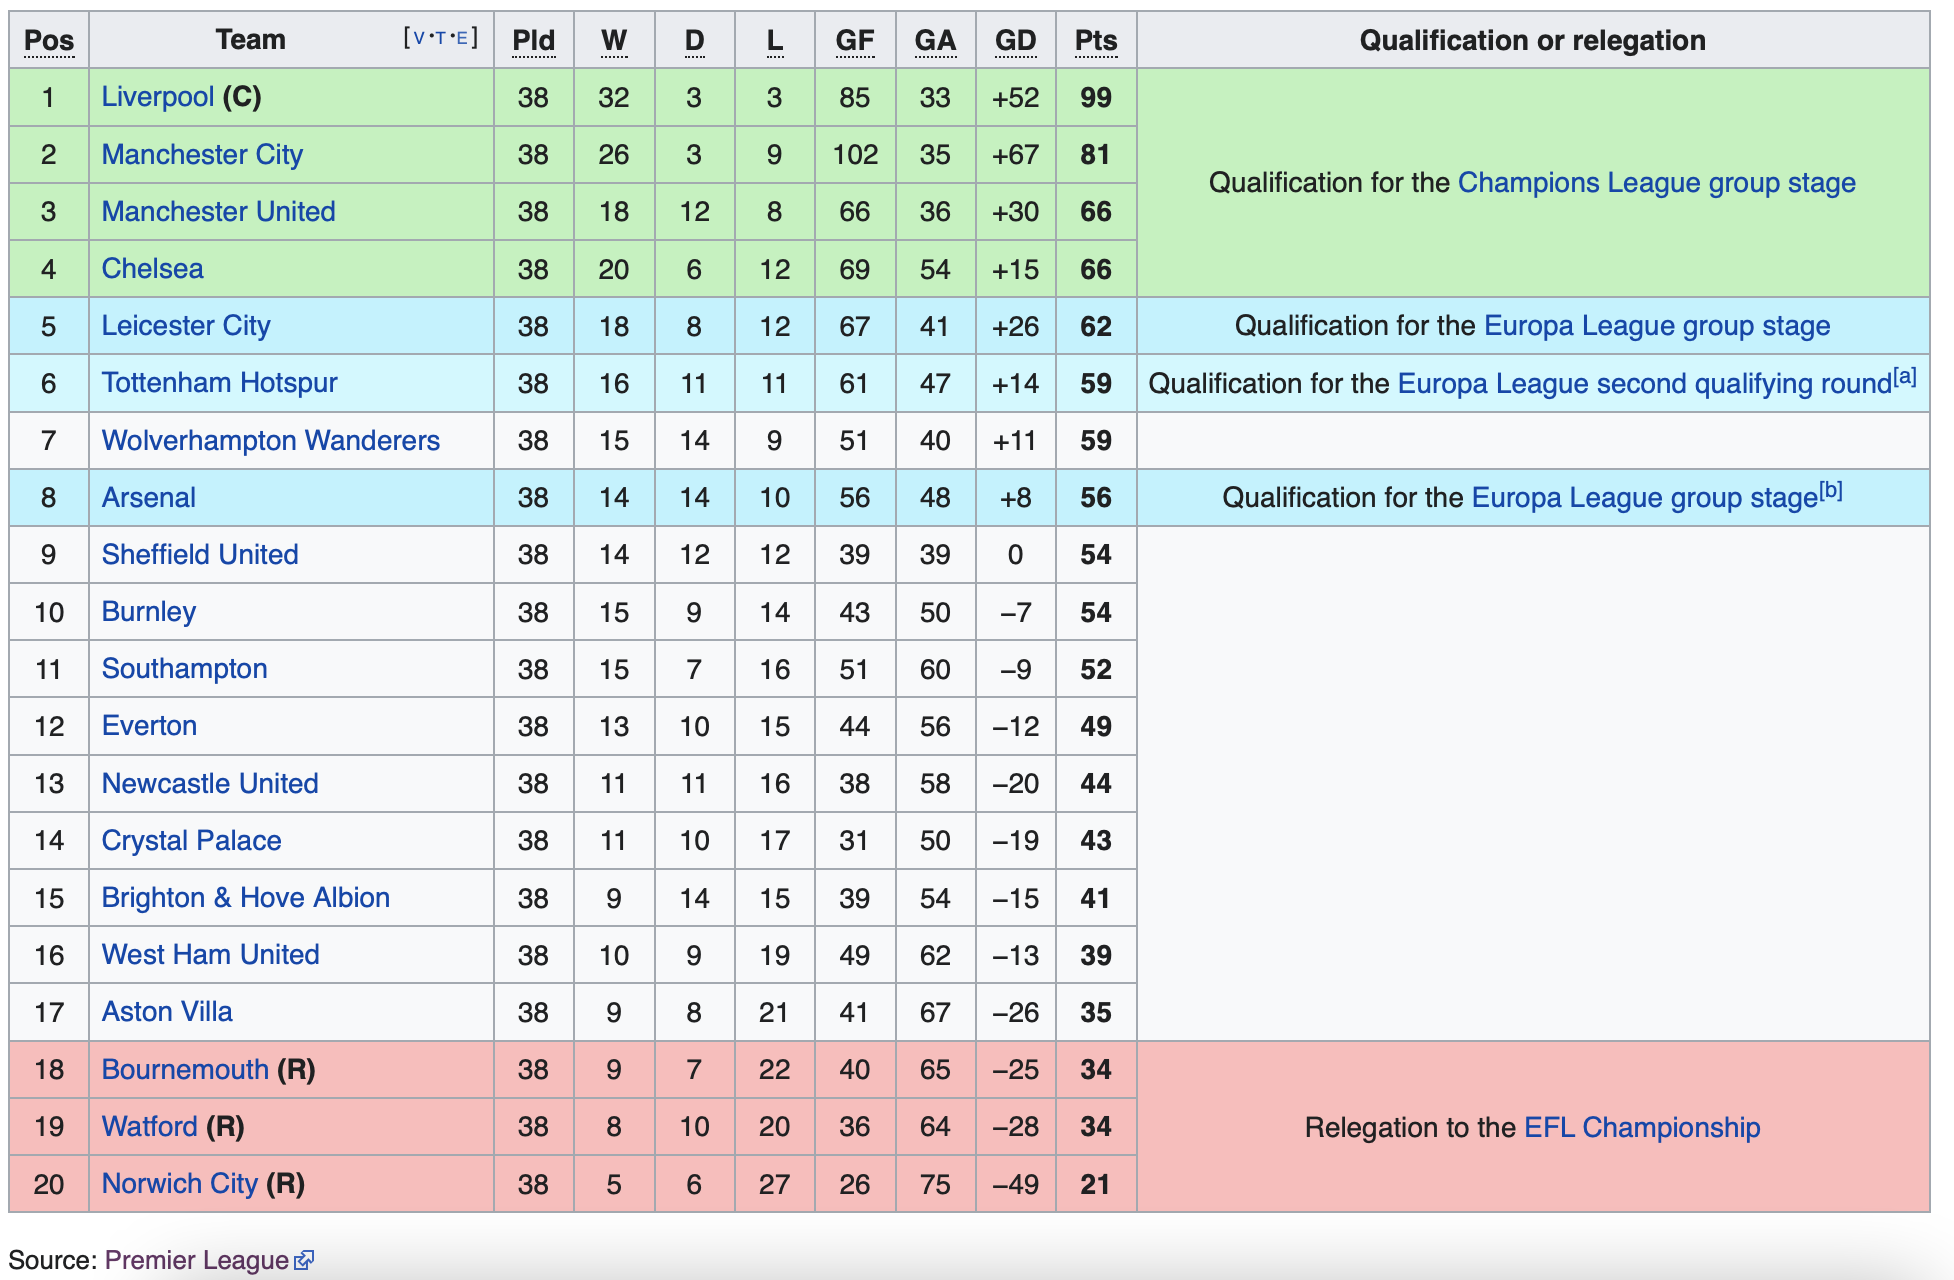

In [283]:
from IPython import display 
display.Image("Table.png")

The season's winner was Liverpool, followed by Manchester City, Manchester United and Chelsea, who were all qualified for the 2020-2021 Champions League. Leicester and Tottenham were qualified for the Europa League thanks to their rankings, while Arsenal was qualified for the competition after winning the 2019-20 FA Cup. Therefore, Arsenal's final ranking did not affect their Europa League Qualification. Finally, Bournemouth, Watford and Norwich City were relegated to the EFL Championship.

Let's start this analysis by loading the datasets.

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [285]:
incidents_raw = pd.read_csv ('VAR_Incidents_Stats.csv')
incidents_raw

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
0,Brighton & Hove Albion,West Ham,Aug. 17,H,Brighton goal for Leandro Trossard ruled out f...,27th minute,AGAINST
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,Conor Hourihane goal ruled out for a foul by W...,42nd minute,FOR
2,Brighton & Hove Albion,Everton,Oct. 26,H,Penalty awarded (scored by Neil Maupay) for fo...,78th minute,FOR
3,Leicester,Brighton & Hove Albion,Nov. 23,H,Jamie Vardy penalty retaken after James Maddis...,80th minute,FOR
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,David Luiz goal disallowed for offside,63rd minute,FOR
5,Brighton & Hove Albion,Sheffield United,Dec. 21,H,John Egan goal ruled out for handball,8th minute,FOR
6,Brighton & Hove Albion,Sheffield United,Dec. 21,H,Jack O'Connell goal disallowed for offside,54th minute,FOR
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,Harry Kane goal ruled out for offside,24th minute,FOR
8,Brighton & Hove Albion,Bournemouth,Dec. 28,H,Dan Burn goal ruled out for offside,58th minute,AGAINST
9,Brighton & Hove Albion,Everton,Jan. 11,A,Goal for Dominic Calvert-Lewin ruled out for h...,75th minute,FOR


By looking closely at this table, we realise that all the values are entered twice. Indeed, each incident is entered once for Team A as the "Team" and Team B as the "Opponent team" and once for Team B as "Team" and Team A as "Opponent Team", meaning that each incident is counted once as "FOR" a team and once "AGAINST" it. 
The table should therefore be cleaned so each incident is only counted once. To clean it, we delete all rows representing an incident against a team.

In [286]:
incidents = incidents_raw[incidents_raw['VAR used'].str.contains("FOR")]
incidents

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,Conor Hourihane goal ruled out for a foul by W...,42nd minute,FOR
2,Brighton & Hove Albion,Everton,Oct. 26,H,Penalty awarded (scored by Neil Maupay) for fo...,78th minute,FOR
3,Leicester,Brighton & Hove Albion,Nov. 23,H,Jamie Vardy penalty retaken after James Maddis...,80th minute,FOR
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,David Luiz goal disallowed for offside,63rd minute,FOR
5,Brighton & Hove Albion,Sheffield United,Dec. 21,H,John Egan goal ruled out for handball,8th minute,FOR
6,Brighton & Hove Albion,Sheffield United,Dec. 21,H,Jack O'Connell goal disallowed for offside,54th minute,FOR
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,Harry Kane goal ruled out for offside,24th minute,FOR
9,Brighton & Hove Albion,Everton,Jan. 11,A,Goal for Dominic Calvert-Lewin ruled out for h...,75th minute,FOR
10,Brighton & Hove Albion,West Ham,Feb. 1,A,Goal for Glenn Murray allowed after incorrect ...,79th minute,FOR
11,Brighton & Hove Albion,Burnley,July 26,A,Jay Rodriguez goal ruled out for offside again...,57th minute,FOR


We now have the table that will be used for the rest of the analysis. As said by ESPN.com, which collected all the data, VAR has been used 109 times. This corresponds to the amount of rows in our table.

In [287]:
teams = pd.read_csv ('VAR_Team_Stats.csv')
teams

,Team,Overturns,Leading to goals for,Disallowed goals for,Leading to goals against,Disallowed goals against,Net goal score,Subjective decisions for,Subjective decisions against,Net subjective score
0,Brighton & Hove Albion,12,2,2,0,7,7,2,0,2
1,Manchester United,13,1,0,2,7,6,6,2,4
2,Crystal Palace,12,3,4,0,1,2,6,2,4
3,Burnley,11,2,3,1,4,2,4,2,2
4,Newcastle,3,1,0,0,0,1,2,0,2
5,Southampton,13,0,0,1,7,6,1,4,-3
6,Liverpool,8,1,3,0,4,2,1,1,0
7,Leicester City,15,1,3,1,4,1,3,3,0
8,Tottenham Hotspur,15,1,4,1,6,2,3,3,0
9,Manchester City,16,3,4,2,2,-1,4,4,0


# 1. What type of incidents was VAR most used for?
This question will be answered using the first dataset (i.e. VAR_Incidents_Stats). The dataset will first be cleaned in order to keep only the relevant information. Afterwards, a string search in the "Incident" column will be executed, followed by a frequency analysis to determine the frequency of each incident type.

We will be working in the "Incident" column. The first step is to convert all characters in it into lowercase characters, so the algorithm matches "Penalty" and "penalty", etc...

In [288]:
# We put all characters in lowercase using a lambda function
incidents['Incident'] = incidents['Incident'].map(lambda x: x.lower())
#incidents

<ipython-input-288-5043ad4228ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['Incident'] = incidents['Incident'].map(lambda x: x.lower())


A string search will now be executed to determine the most frequent types of incidents reviewed by VAR. The incidents are separated in 7 different categories:
1. A goal ruled out for offside
2. A goal ruled out for a foul (by the attacking team)
3. A goal ruled out for a handball (by the attacking team)
4. A penalty that needs to be retaken
5. A goal allowed after being disallowed by the referees
6. A penalty awarded
7. A penalty cancelled 

To represent the data, we will first display a table of all incidents, then a plot showing the number of incidents of this type per team.

## A) Goals ruled out for offside

Let's start this analysis by analysing the number of goals ruled out for offside for each team.

In [289]:
#Displays incidents that contain the words "ruled out" and "offside".
#In order to avoid having the goals that have been awarded after being ruled out for offside,
#these incidents don't contain the word "originally".
offside = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("offside")&~incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("originally")|incidents['Incident'].str.contains("disallowed")&incidents['Incident'].str.contains("offside")&~incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("originally")&~incidents['Incident'].str.contains("penalty")|incidents['Incident'].str.contains("scored")&incidents['Incident'].str.contains("offside")&~incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("originally")&~incidents['Incident'].str.contains("penalty")|incidents['Incident'].str.contains("build-up")&incidents['Incident'].str.contains("offside")&~incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("originally")&~incidents['Incident'].str.contains("penalty")]
offside

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,david luiz goal disallowed for offside,63rd minute,FOR
6,Brighton & Hove Albion,Sheffield United,Dec. 21,H,jack o'connell goal disallowed for offside,54th minute,FOR
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,harry kane goal ruled out for offside,24th minute,FOR
11,Brighton & Hove Albion,Burnley,July 26,A,jay rodriguez goal ruled out for offside again...,57th minute,FOR
19,Manchester United,Chelsea,Feb. 17,A,olivier giroud goal disallowed for offside,77th minute,FOR
21,Manchester United,Everton,March 1,A,goal for everton disallowed for offside agains...,92nd minute,FOR
23,Manchester United,Crystal Palace,July,A,jordan ayew goal disallowed for offside,55th minute,FOR
37,Burnley,Aston Villa,Sept. 28,A,goal for villa's john mcginn ruled out on revi...,25th minute,FOR
42,Burnley,Aston Villa,Jan. 1,H,goal for villa's jack grealish ruled out on re...,11th minute,FOR
51,Southampton,Sheffield United,Sept. 14,A,oliver mcburnie's goal disallowed for offside,52nd minute,FOR


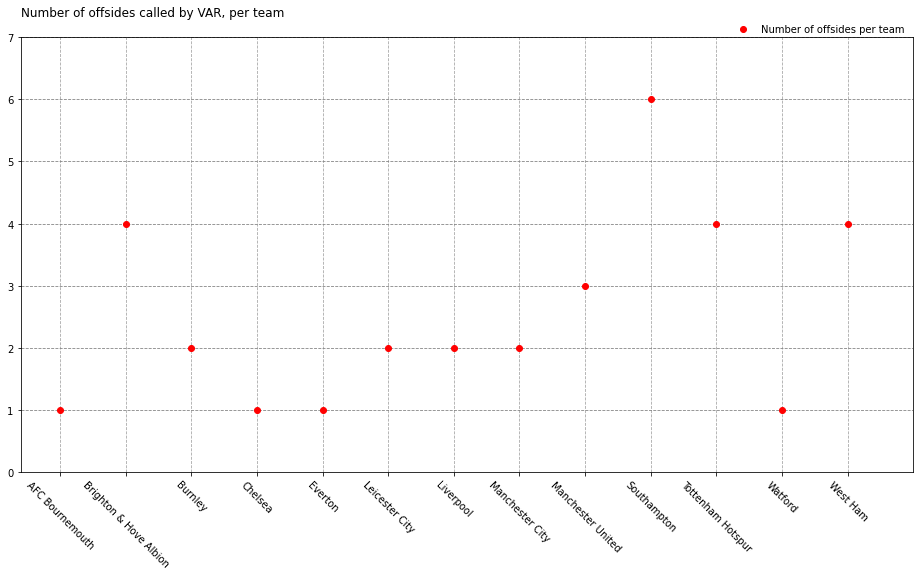

In [290]:
nbr_incidents_per_team = offside.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 13)
plt.ylim(0, 7)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

We can see in this plot that half of the Premier League teams have had at least one goal ruled out for offside. Out of these 10 teams, 4 had one disallowed goal, 5 had 2, and only Southampton had 3 goals disallowed for offside. 


## B) Goals ruled out for a foul (by the attacking team)

Let's now take a look at the amount of goals ruled out for a foul committed by the attacking team.

In [291]:
#Displays goals that have been "ruled out" because of a foul or that have been "disallowed" because of a foul
foul = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("foul")|incidents['Incident'].str.contains("disallowed")&incidents['Incident'].str.contains("foul")|incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("push")]
foul

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
1,Brighton & Hove Albion,Aston Villa,Oct. 19,A,conor hourihane goal ruled out for a foul by w...,42nd minute,FOR
17,Manchester United,Liverpool,Jan. 19,A,roberto firmino goal disallowed for foul on da...,25th minute,FOR
18,Manchester United,Chelsea,Feb. 17,A,kurt zouma goal disallowed for foul on brandon...,55th minute,FOR
27,Crystal Palace,Arsenal,Oct. 27,A,sokratis goal disallowed for foul by calum cha...,83rd minute,FOR
66,Liverpool,Crystal Palace,Nov. 23,A,james tomkins goal ruled out for push by jorda...,43rd minute,FOR
75,Leicester City,Burnley,Oct. 21,H,jonny evans own goal ruled out due to a foul b...,80th minute,FOR
207,Norwich City,Chelsea,Aug. 24,H,chelsea goal for kurt zouma disallowed for a f...,77th minute,FOR


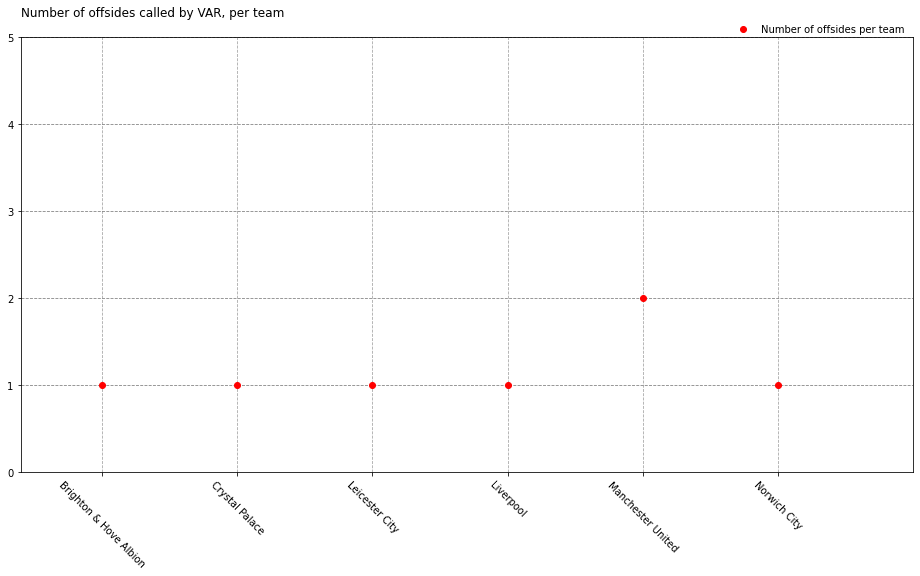

In [292]:
nbr_incidents_per_team = foul.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 6)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

It is directly visible that less teams have had goals ruled out for offside than for a foul. Apart from Brighton & Hove Albion, none of these 5 teams had goals ruled out for an offside. This incident also happens rarely, as Manchester United is the only team with 2 goals ruled out for committing a foul.

## C) Goals ruled out for a handball (by the attacking team)

Let's takt a look at the amount of goals ruled out for a handball committed by the attacking team.

In [293]:
handball = incidents[incidents['Incident'].str.contains("ruled out")&incidents['Incident'].str.contains("handball")&~incidents['Incident'].str.contains("originally")|incidents['Incident'].str.contains("disallowed")&incidents['Incident'].str.contains("handball")&~incidents['Incident'].str.contains("originally")]
handball
#We added the constraint that the incidents don't include to word "originally" to avoid goals that have been
#given after being ruled out

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
5,Brighton & Hove Albion,Sheffield United,Dec. 21,H,john egan goal ruled out for handball,8th minute,FOR
9,Brighton & Hove Albion,Everton,Jan. 11,A,goal for dominic calvert-lewin ruled out for h...,75th minute,FOR
13,Manchester United,Liverpool,Oct. 20,H,sadio mane goal ruled out for handball,43rd minute,FOR
20,Manchester United,Watford,Feb. 23,H,goal for troy deeney disallowed for handball b...,52nd minute,FOR
43,Burnley,Bournemouth,Feb. 22,H,goal for josh king ruled out for handball in b...,22nd minute,FOR
44,Burnley,Bournemouth,Feb. 22,H,goal for harry wilson ruled out for handball b...,57th minute,FOR
55,Southampton,West Ham,Dec. 14,H,goal for michail antonio ruled out for handball,52nd minute,FOR
71,Liverpool,Man City,July 2,A,city goal for riyad mahrez ruled out for handb...,90th minute,FOR
72,Leicester City,Wolves,Aug. 11,H,wolves goal for leander dendoncker disallowed ...,51st minute,FOR
87,Tottenham Hotspur,Man City,Aug. 17,A,city goal for gabriel jesus ruled out for hand...,90th minute,FOR


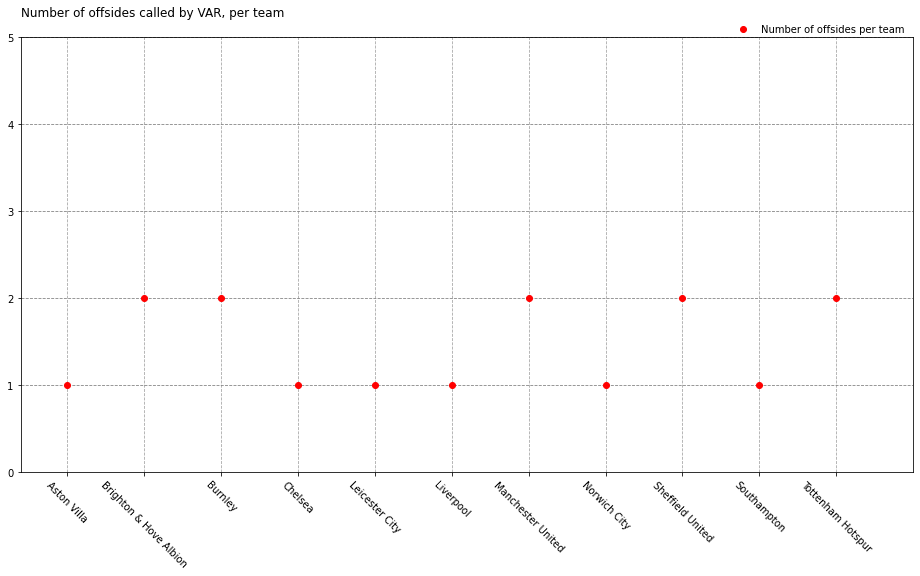

In [294]:
nbr_incidents_per_team = handball.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 11)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

This plot shows that more than half of the teams (11) had at least one goal disallowed for a handball. Brighton & Hove Albion had 2 goals disallowed for this reason aswell. 

## D) Penalties retaken

Penalties need to be retaken if the goalkeeper is off his line when the penalty taker touches the ball or if a player enters the penalty area. before the shot is taken. Let's take a look at the amount of penalties retaken because of VAR.

In [295]:
#Look for sentences containing the words "penalty" and "retaken"
penalty_retaken = incidents[incidents['Incident'].str.contains("penalty")&incidents['Incident'].str.contains("retaken")]
penalty_retaken

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
3,Leicester,Brighton & Hove Albion,Nov. 23,H,jamie vardy penalty retaken after james maddis...,80th minute,FOR
103,Manchester City,West Ham,Aug. 10,A,missed city penalty retaken due to encroachmen...,86th minute,FOR
107,Manchester City,Wolves,Dec. 27,A,missed city penalty retaken due to encroachmen...,25th minute,FOR
121,Arsenal,Norwich,Dec. 1,A,pierre-emerick aubameyang missed penalty retak...,29th minute,FOR


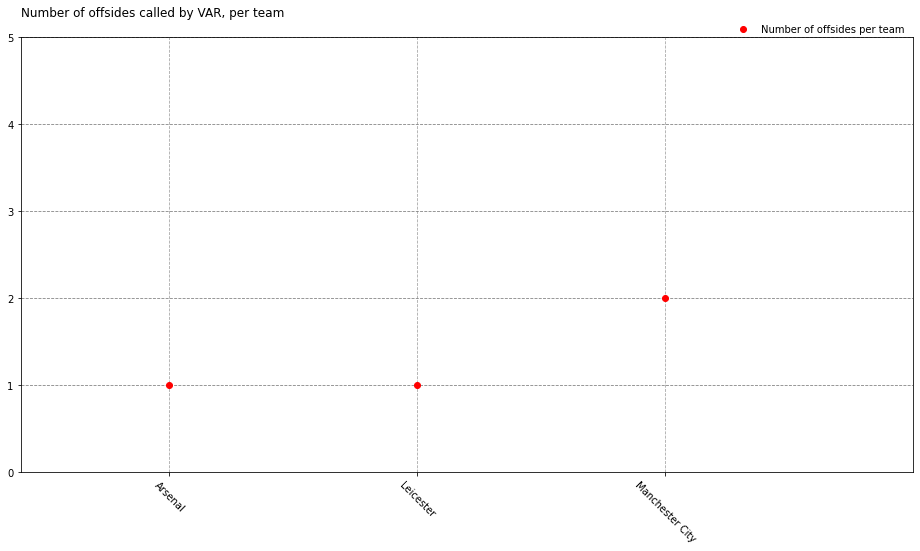

In [296]:
nbr_incidents_per_team = penalty_retaken.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 3)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Only 3 teams had to retake penalties this year, Leicester, Manchester City and Arsenal. By looking at the previous table, we realise that Leicester's retaken penalty was against Brighton.

## E) Goals allowed after being disallowed

In [297]:
#Displays sentences with the words "allowed" and "after", or "given" and "after". 
#This conveniently doesn't show penalties allowed after a referee decision
goal_allowed = incidents[incidents['Incident'].str.contains("allowed") & incidents['Incident'].str.contains("after")|incidents['Incident'].str.contains("given")& incidents['Incident'].str.contains("after")|incidents['Incident'].str.contains("awarded")& incidents['Incident'].str.contains("after")|incidents['Incident'].str.contains("originally")& incidents['Incident'].str.contains("goal")]
goal_allowed

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
10,Brighton & Hove Albion,West Ham,Feb. 1,A,goal for glenn murray allowed after incorrect ...,79th minute,FOR
25,Crystal Palace,West Ham,Oct. 5,A,jordan ayew goal awarded after originally bein...,87th minute,FOR
30,Crystal Palace,Norwich,Jan. 1,A,connor wickham goal awarded after originally b...,85th minute,FOR
48,Newcastle,Sheffield United,Dec. 5,A,"jonjo shelvey goal, originally ruled out for o...",70th minute,FOR
68,Liverpool,Wolves,Dec. 29,H,goal for sadio mane given after originally rul...,42nd minute,FOR
79,Leicester City,Everton,Dec. 1,H,"kelechi iheanacho effort, originally ruled off...",94th minute,FOR
118,Arsenal,Man United,Sept. 30,A,"pierre-emerick aubameyang goal, originally rul...",58th minute,FOR
124,Arsenal,West Ham,March 7,H,alexandre lacazette goal allowed after incorre...,78th minute,FOR
135,AFC Bournemouth,West Ham,Sept. 28,H,"josh king goal, originally ruled out for offsi...",17th minute,FOR
136,AFC Bournemouth,Chelsea,Dec. 14,A,"dan gosling goal, originally disallowed for of...",84th minute,FOR


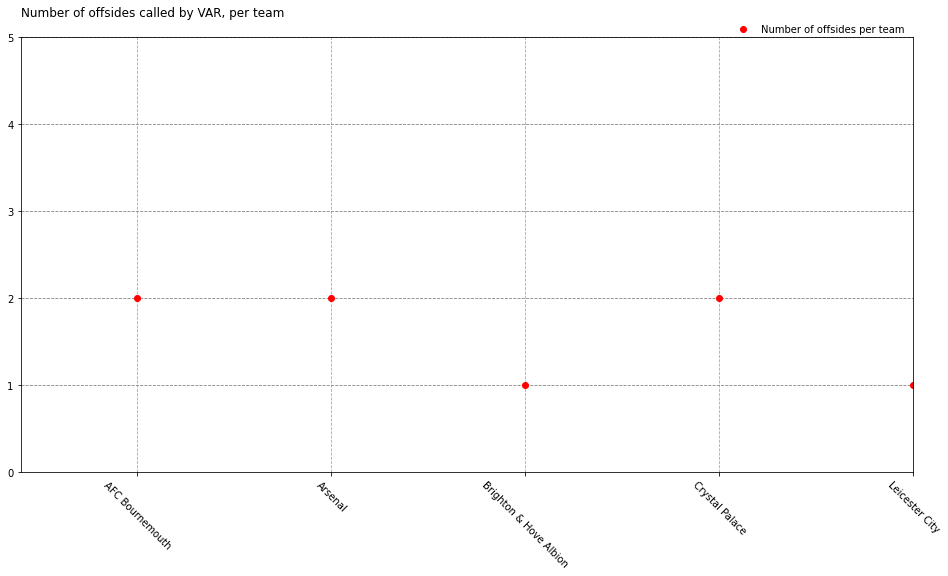

In [298]:
nbr_incidents_per_team = goal_allowed.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6,4)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Not a lot of goals have been allowed by VAR after being originally disallowed. Three teams are present in this graph. Unsurprisingly, Brighton is one of them.

## F) Penalties awarded

If the penalty is not obvious, the referee will sometimes ask the VAR before giving it to the attacking team. Let's analyse the penalties awarded by VAR last season.

In [299]:
#Displays awarded penalties
penalties_awarded = incidents[incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("awarded")&~incidents['Incident'].str.contains("cancelled")&~incidents['Incident'].str.contains("overturned")|incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("given")&~incidents['Incident'].str.contains("cancelled")&~incidents['Incident'].str.contains("overturned")]
penalties_awarded

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
2,Brighton & Hove Albion,Everton,Oct. 26,H,penalty awarded (scored by neil maupay) for fo...,78th minute,FOR
14,Manchester United,Norwich,Oct. 27,A,penalty awarded (missed by marcus rashford) fo...,25th minute,FOR
15,Manchester United,Norwich,Oct. 27,A,penalty awarded (missed by anthony martial) fo...,41st minute,FOR
16,Manchester United,Man City,Dec. 7,A,penalty awarded (scored by marcus rashford) fo...,23rd minute,FOR
26,Crystal Palace,Arsenal,Oct. 27,A,penalty awarded for foul by calum chambers on ...,32nd minute,FOR
41,Burnley,Watford,Nov. 23,A,penalty (scored by barnes) awarded for foul on...,80th minute,FOR
44,Burnley,Bournemouth,Feb. 22,H,goal for harry wilson ruled out for handball b...,57th minute,FOR
50,Newcastle,Southampton,March 7,A,penalty awarded for handball by sofiane boufal,40th minute,FOR
62,Southampton,Bournemouth,July 19,A,penalty awarded (missed by danny ings) for han...,57th minute,FOR
97,Tottenham Hotspur,Aston Villa,Feb. 16,A,penalty (missed by son heung-min but scored on...,45th minute,FOR


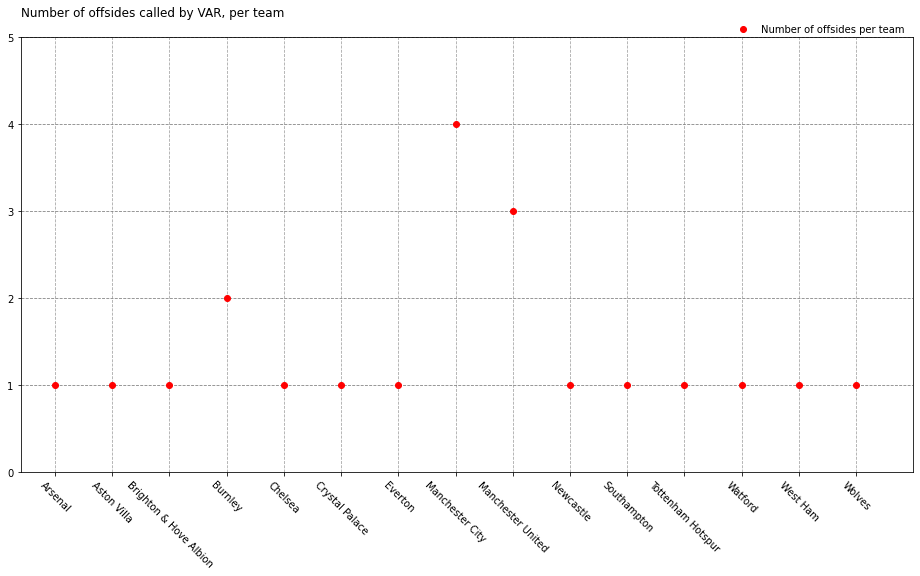

In [300]:
nbr_incidents_per_team = penalties_awarded.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 15)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Only 5 teams didn't have a penalty awarded by VAR last season: Norwich, Bournemouth, Sheffield, Leicester and Liverpool. It may come as a surprise that Liverpool, the league's winner (and the team with the 2nd highest amount of goals scored) doesn't appear in this plot. Manchester City and Manchester United have the highest amount (3) of penalties awarded by VAR.
In total, 22 penalties have been awarded thanks to VAR. According to MyFootballFacts.com (https://www.myfootballfacts.com/premier-league/all-time-premier-league/premier-league-penalty-statistics/), 92 penalties have been awarded last season. Therefore, VAR accounts for 24% of the total number of penalties in the season.

## G) Penalties cancelled

Penalties can also be cancelled by VAR if the referee made a mistake. Let's take a look at this data.

In [301]:
#Penalties cancelled after the referee's decision to allow it
penalties_cancelled = incidents[incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("cancelled")|incidents['Incident'].str.contains("penalty") & incidents['Incident'].str.contains("overturned")]
penalties_cancelled

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
32,Crystal Palace,Manchester City,Jan. 18,A,penalty for handball against jairo riedewald c...,72nd minute,FOR
35,Crystal Palace,Aston Villa,July 12,A,"penalty cancelled, awarded for foul on jack gr...",47th minute,FOR
39,Burnley,Chelsea,Oct. 26,H,penalty overturned for diving by callum hudson...,76th minute,FOR
80,Leicester City,Southampton,Jan. 11,H,penalty for southampton cancelled for offside ...,63rd minute,FOR
98,Tottenham Hotspur,Man United,June 19,H,penalty awarded for a foul on bruno fernandes ...,91st minute,FOR
128,Everton,Leicester,Dec. 1,A,penalty for foul on ben chilwell by mason holg...,34th minute,FOR
143,AFC Bournemouth,Man City,July 15,A,"man city penalty, for a foul on gabriel jesus ...",71st minute,FOR


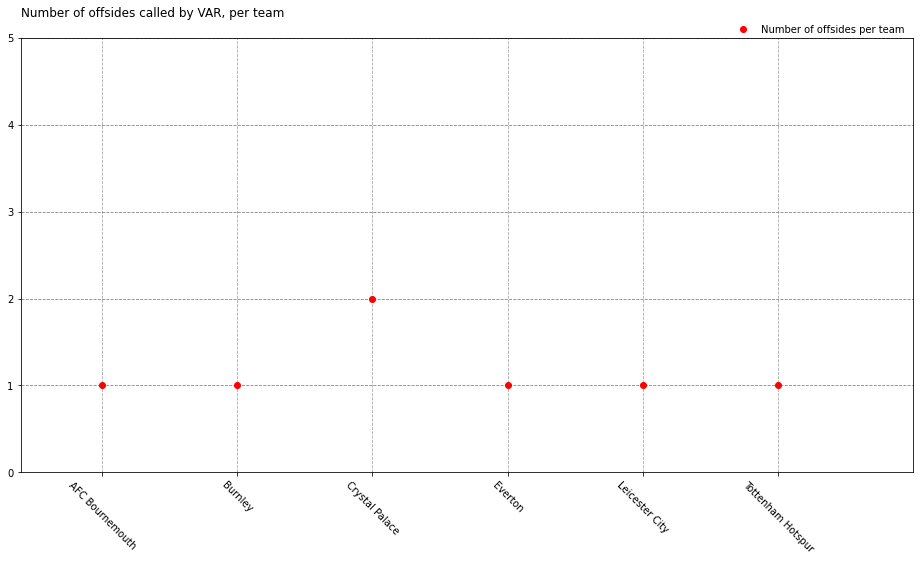

In [302]:
nbr_incidents_per_team = penalties_cancelled.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 6)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Only 4 penalties have been cancelled by VAR last season, 2 of them for Crystal Palace, one for Leicester and one for Everton. 

## H) Red cards given

VAR is also used to review potential red cards attribution. Let's analyse this data.

In [303]:
redcards = incidents[incidents['Incident'].str.contains("red card")&~incidents['Incident'].str.contains("rescinded")&~incidents['Incident'].str.contains("downgraded")|incidents['Incident'].str.contains("sent off")&~incidents['Incident'].str.contains("rescinded")&~incidents['Incident'].str.contains("downgraded")]
redcards

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
31,Crystal Palace,Arsenal,Jan. 11,H,pierre-emerick aubameyang sent off for foul on...,65th minute,FOR
49,Newcastle,Southampton,March 7,A,moussa djenepo sent off for challenge on isaac...,28th minute,FOR
76,Leicester City,Southampton,Oct. 25,A,ryan bertrand sent off for challenge on ayoze ...,12th minute,FOR
86,Leicester City,Arsenal,July 7,A,edward nketiah sent off for foul on james justin,75th minute,FOR
153,Chelsea,Tottenham,Dec. 22,A,son heung-min sent off for foul on antonio rud...,62nd minute,FOR
156,Chelsea,Manchester City,June 25,H,fernandinho sent off for deliberate handball o...,77th minute,FOR
204,Wolves,Watford,Jan. 1,A,christian kabasele sent off for professional f...,68th minute,FOR
214,Norwich City,Bournemouth,Jan. 18,H,red card for ben godfrey for foul on callum wi...,76th minute,FOR
216,Norwich City,Burnley,July 18,H,red card for emiliano buendia for an elbow on ...,33rd minute,FOR


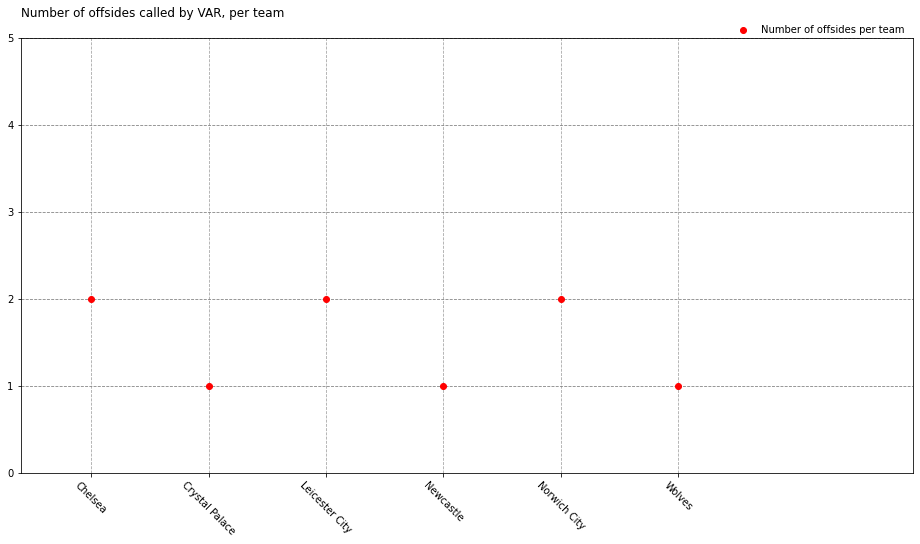

In [304]:
nbr_incidents_per_team = redcards.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 7)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Four red cards were given because of VAR, for Bournemouth, Newcastle and Norwich City. These teams had 3 red cards each during the season. Therefore, for Bournemouth and Newcastle, VAR given red cards only accounted for 1/3 of the total amount, while it accounted for 2/3 of Norwich's total red cards. Furthermore, according to MyFootballFacts.com (https://www.myfootballfacts.com/stats/premier-league-by-season/premier-league-2020-21/premier-league-discipline-2020-21/#Red%20and%20Yellow%20Cards%20by%20Club), 34 red cards were given during the season, so VAR only accounted for less than 12% of the total number of redcards.

## I) Red cards taken back

Red cards can be given by VAR, or taken back if the referee made a mistake.

In [305]:
redcards_cancelled = incidents[incidents['Incident'].str.contains("red")&~incidents['Incident'].str.contains("sco")&incidents['Incident'].str.contains("rescinded")|incidents['Incident'].str.contains("downgraded")]
redcards_cancelled

,Team,Opponent Team,Date,Site,Incident,Time,VAR used
33,Crystal Palace,Sheffield United,Feb. 1,H,red card for joel ward rescinded,74th minute,FOR
180,West Ham,Bournemouth,Jan. 1,H,aaron cresswell red card downgraded to yellow,76th minute,FOR
190,Sheffield United,Norwich,Dec. 8,A,red card for chris basham rescinded,74th minute,FOR


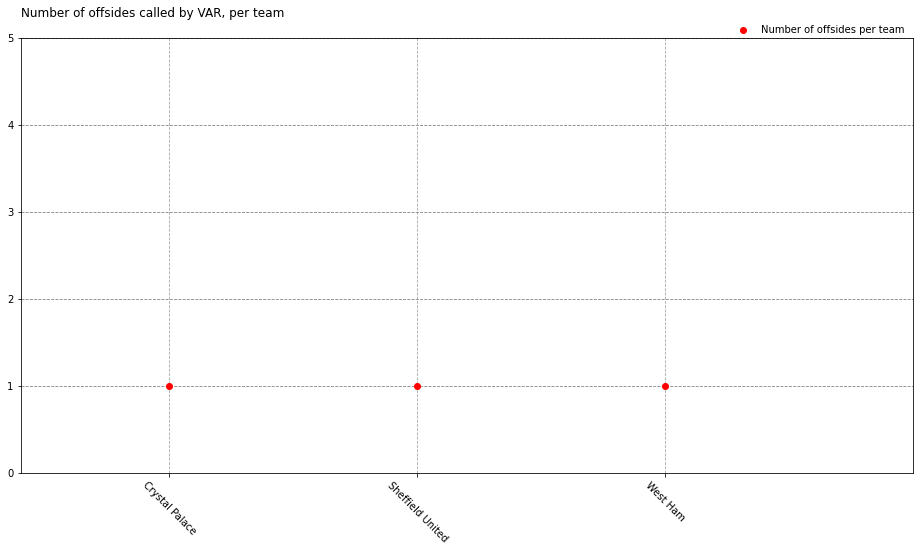

In [306]:
nbr_incidents_per_team = redcards_cancelled.pivot_table(index=['Team'], aggfunc='size');

fig, ax = plt.subplots(1, figsize=(16, 8))
plt.plot(nbr_incidents_per_team, 'ro')
plt.xlim(-0.6, 3)
plt.ylim(0, 5)
# grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=1)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# x tick
plt.xticks(rotation=-45);

# title and legend
legend_label = ['Number of offsides per team']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Number of offsides called by VAR, per team\n', loc='left')
plt.show()

Only 3 red cards were taken back after being given by the referee, one for each of the following teams: West Ham, Sheffield United and Crystal Palace. West Ham's red card was downgraded for a yellow one.

## Representing the data

We can now compare all the previous results in bar chart to verify for which incident is VAR used the most.

In [307]:
#First count the number of occurrences for each incident.
offside_nbr = len(offside[offside == 'VAR used']);
foul_nbr = len(foul[foul == 'VAR used']);
handball_nbr = len(handball[handball == 'VAR used']);
penalty_retaken_nbr = len(penalty_retaken[penalty_retaken == 'VAR used']);
goal_allowed_nbr = len(goal_allowed[goal_allowed == 'VAR used']);
penalties_awarded_nbr = len(penalties_awarded[penalties_awarded == 'VAR used']);
penalties_cancelled_nbr = len(penalties_cancelled[penalties_cancelled == 'VAR used']);
redcards_nbr = len(redcards[redcards == 'VAR used'])
redcards_back_nbr = len(redcards_cancelled == 'VAR used')

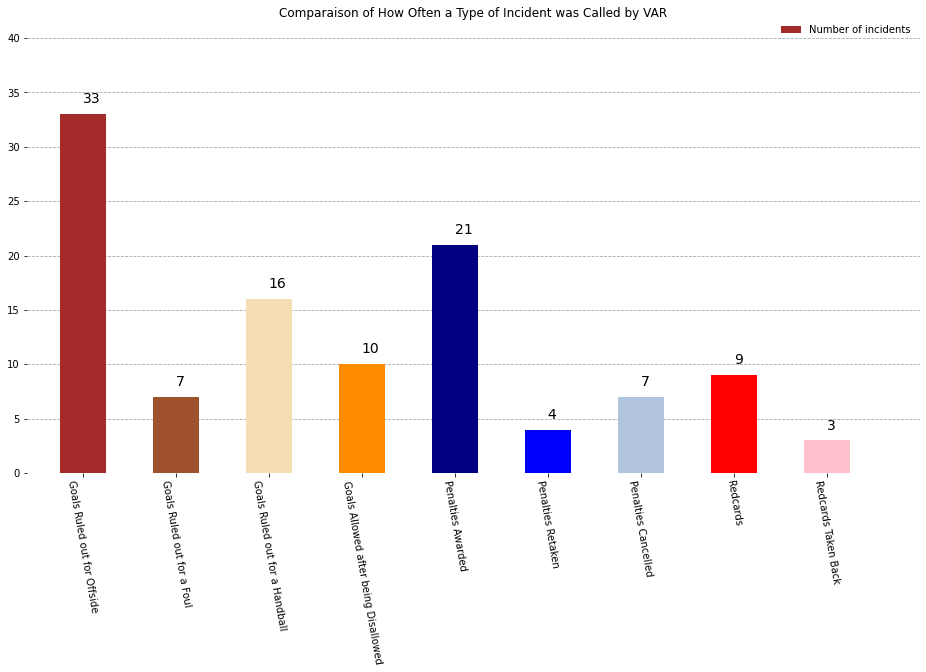

In [308]:
#Plotting everything in a bar chart for a better comparison. 
#List
VAR_USED = [offside_nbr,foul_nbr,handball_nbr,goal_allowed_nbr,penalties_awarded_nbr,penalty_retaken_nbr,penalties_cancelled_nbr,redcards_nbr,redcards_back_nbr]

# list to dict
my_dict = {'VAR_USED': VAR_USED}

# dict to df
result_df = pd.DataFrame(my_dict)
result_df


fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(result_df.index, result_df['VAR_USED'], color=['brown', 'sienna', 'wheat', 'darkorange', 'navy', 'blue', 'lightsteelblue', 'red', 'pink'], width =0.5)

# x and y limits
plt.xlim(-0.6, 9)
plt.ylim(0, 40)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)

# Show value of each bar
for index,data in enumerate(result_df['VAR_USED']):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=14))
    
# x ticks
xticks_labels = ['Goals Ruled out for Offside', 'Goals Ruled out for a Foul', 'Goals Ruled out for a Handball', 'Goals Allowed after being Disallowed','Penalties Awarded','Penalties Retaken', 'Penalties Cancelled','Redcards','Redcards Taken Back']
plt.xticks(result_df.index , labels = xticks_labels , rotation=-80)

# title and legend
legend_label = ['Number of incidents']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Comparaison of How Often a Type of Incident was Called by VAR\n')
plt.show()

- Most used for awarding penalties
- Ruled out for offside = for a handball
- More goals ruled out

- Penalties awarded > retaken = cancelled

110 total: Incident 44 is counted twice: https://youtu.be/rY6IkCrDjRo?t=25

# 2. Is there a gap between the number of overturned decisions for and against each team? 

This second question will be answered using the "VAR_Teams_Stats" dataset. After cleaning it, the number of overturned decisions for and against each team will be analysed and presented in a suitable manner. 
Let's first display a table where the teams will be sorted by the number of overturned decisions in their games, in descending order.

In [309]:
sorted_teams = teams.sort_values("Overturns",ascending=False)
sorted_teams

,Team,Overturns,Leading to goals for,Disallowed goals for,Leading to goals against,Disallowed goals against,Net goal score,Subjective decisions for,Subjective decisions against,Net subjective score
16,West Ham,16,1,5,5,4,-5,2,1,1
9,Manchester City,16,3,4,2,2,-1,4,4,0
7,Leicester City,15,1,3,1,4,1,3,3,0
8,Tottenham Hotspur,15,1,4,1,6,2,3,3,0
5,Southampton,13,0,0,1,7,6,1,4,-3
1,Manchester United,13,1,0,2,7,6,6,2,4
0,Brighton & Hove Albion,12,2,2,0,7,7,2,0,2
12,AFC Bournemouth,12,2,5,1,1,-3,2,4,-2
2,Crystal Palace,12,3,4,0,1,2,6,2,4
13,Chelsea,12,2,4,2,2,-2,4,4,0


In [310]:
sorted_teams['Overturns'].describe()

count    20.00000
mean     10.90000
std       3.49285
min       3.00000
25%       8.75000
50%      11.50000
75%      13.00000
max      16.00000
Name: Overturns, dtype: float64

We can see that the teams that had the most decisions overturned by VAR are West Ham and Manchester City, with 16 overturned decisions, so exactly one overturned decision every 2 games. On the other hand, the team with the least amount of overturned decisions is Newcastle, with only 3 referee decisions corrected by the VAR in the season. 
The average number of overturned decisions per game is 11. The median is really close (11.5) and the standard deviation is 3.5. 
The number of overturned decisions leading to goals for and against each team will now be analysed.

In [311]:
team_decisions = sorted_teams.sort_values("Overturns",ascending=True)
team_decisions = team_decisions.drop(['Overturns', 'Leading to goals for', 'Leading to goals against', 'Disallowed goals for', 'Disallowed goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_decisions

,Team,Subjective decisions for,Subjective decisions against
4,Newcastle,2,0
14,Watford,1,3
15,Aston Villa,2,3
11,Everton,2,2
6,Liverpool,1,1
10,Arsenal,1,4
18,Wolves,2,1
3,Burnley,4,2
19,Norwich City,1,5
17,Sheffield United,1,2


<AxesSubplot:ylabel='Team'>

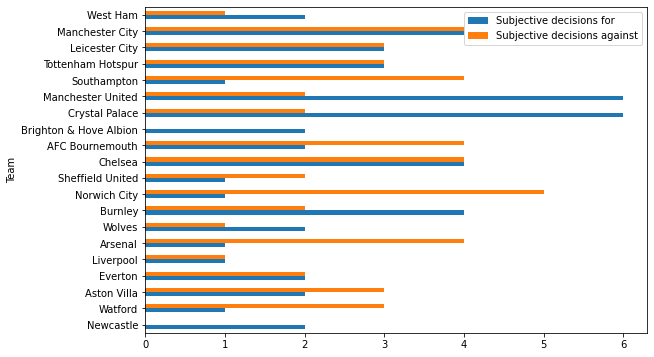

In [312]:
team_decisions.plot.barh('Team', figsize=(9, 6))

In [313]:
team_goals = sorted_teams.sort_values("Overturns",ascending=True)
team_goals = team_goals.drop(['Overturns', 'Subjective decisions for', 'Subjective decisions against', 'Disallowed goals for', 'Disallowed goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_goals

,Team,Leading to goals for,Leading to goals against
4,Newcastle,1,0
14,Watford,1,2
15,Aston Villa,0,1
11,Everton,2,1
6,Liverpool,1,0
10,Arsenal,4,1
18,Wolves,1,1
3,Burnley,2,1
19,Norwich City,0,2
17,Sheffield United,0,1


<AxesSubplot:ylabel='Team'>

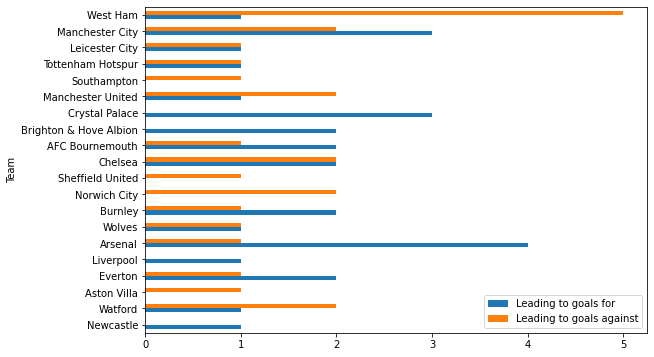

In [314]:
team_goals.plot.barh('Team', figsize=(9, 6))

In [315]:
team_disallowed = sorted_teams.sort_values("Overturns",ascending=True)
team_disallowed = team_disallowed.drop(['Overturns', 'Subjective decisions for', 'Subjective decisions against', 'Leading to goals for', 'Leading to goals against', 'Net goal score', 'Net subjective score'], axis = 1)
team_disallowed

,Team,Disallowed goals for,Disallowed goals against
4,Newcastle,0,0
14,Watford,1,1
15,Aston Villa,3,1
11,Everton,2,1
6,Liverpool,3,4
10,Arsenal,2,0
18,Wolves,4,1
3,Burnley,3,4
19,Norwich City,2,2
17,Sheffield United,5,2


<AxesSubplot:ylabel='Team'>

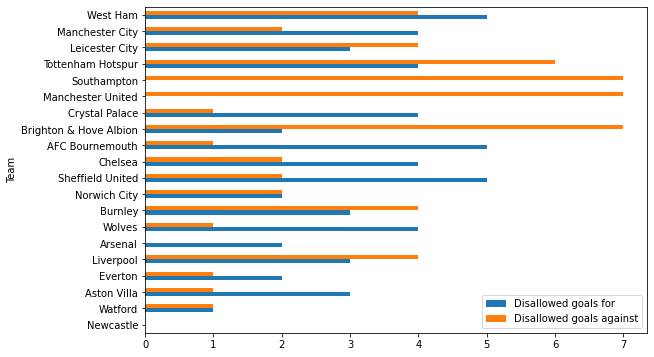

In [316]:
team_disallowed.plot.barh('Team', figsize=(9, 6))

## 3. When is VAR most used during a game?

The aim is to analyse when is VAR most used during the course of a Premier League match using the Incidents table. For example, is it more used during the second half than the first half? Are there "crucial" moments in a game where VAR is often used? 
To answer this question, we will look at the correlation between different events and perform a regression analysis with the most relevant data.

Thiw will be done in three steps:
1) Change the incident descriptions to numbers ranging from 1 to 7 depending on the incident type, as described in Q.1. This will make the correlation analysis easier.

2) Correlation analysis between the different columns 

3) Find two columns with a big correlation and plot a regression

Before answering the question, we can plot the amount of time VAR was used against the calendar month and the amount of time VAR was used against the time where it was used.

In [317]:
# Let us make a df to count VAR uses per month
months = {'Month': ['Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'March', 'April', 'May','June', 'July'], 'VAR uses': [0,0,0,0,0,0,0,0,0,0,0,0]}
incidents_per_month = pd.DataFrame(months) 

# We count the uses per month at hand of a string search and add a collumn with labels each month with an integer value
jan = incidents.loc[incidents['Date'].str.contains('Jan')]
jan['Month'] = 6
feb = incidents.loc[incidents['Date'].str.contains('Feb')]
feb['Month'] = 7
mar = incidents.loc[incidents['Date'].str.contains('March')]
mar['Month'] = 8
apr = incidents.loc[incidents['Date'].str.contains('April')]
apr['Month'] = 9
may = incidents.loc[incidents['Date'].str.contains('May')]
may['Month'] = 10
jun = incidents.loc[incidents['Date'].str.contains('June')]
jun['Month'] = 11
jul = incidents.loc[incidents['Date'].str.contains('July')]
jul['Month'] = 12
aug = incidents.loc[incidents['Date'].str.contains('Aug')]
aug['Month'] = 1
sep = incidents.loc[incidents['Date'].str.contains('Sept')]
sep['Month'] = 2
oct = incidents.loc[incidents['Date'].str.contains('Oct')]
oct['Month'] = 3
nov = incidents.loc[incidents['Date'].str.contains('Nov')]
nov['Month'] = 4
dec = incidents.loc[incidents['Date'].str.contains('Dec')]
dec['Month'] = 5

#Join the df's for potential later use
incidents_months = pd.DataFrame()
incidents_months = jan.append(feb)
incidents_months = incidents_months.append(mar)
incidents_months = incidents_months.append(apr)
incidents_months = incidents_months.append(may)
incidents_months = incidents_months.append(jun)
incidents_months = incidents_months.append(jul)
incidents_months = incidents_months.append(aug)
incidents_months = incidents_months.append(sep)
incidents_months = incidents_months.append(oct)
incidents_months = incidents_months.append(nov)
incidents_months = incidents_months.append(dec)

# We fill the created dataframe of uses per month with the values counted
incidents_per_month.at[0,'VAR uses'] = len(aug.index)
incidents_per_month.at[1,'VAR uses'] = len(sep.index)
incidents_per_month.at[2,'VAR uses'] = len(oct.index)
incidents_per_month.at[3,'VAR uses'] = len(nov.index)
incidents_per_month.at[4,'VAR uses'] = len(dec.index)
incidents_per_month.at[5,'VAR uses'] = len(jan.index)
incidents_per_month.at[6,'VAR uses'] = len(feb.index)
incidents_per_month.at[7,'VAR uses'] = len(mar.index)
incidents_per_month.at[8,'VAR uses'] = len(apr.index)
incidents_per_month.at[9,'VAR uses'] = len(may.index)
incidents_per_month.at[10,'VAR uses'] = len(jun.index)
incidents_per_month.at[11,'VAR uses'] = len(jul.index)

#Results
incidents_per_month

<ipython-input-317-402470ee91ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan['Month'] = 6
<ipython-input-317-402470ee91ba>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feb['Month'] = 7
<ipython-input-317-402470ee91ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,Month,VAR uses
0,Aug,6
1,Sept,8
2,Oct,12
3,Nov,8
4,Dec,24
5,Jan,14
6,Feb,12
7,March,4
8,April,0
9,May,0


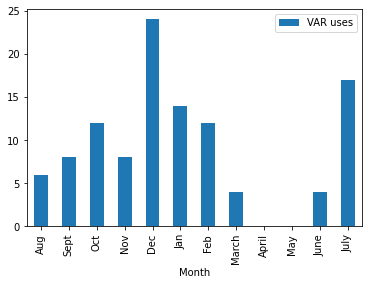

In [318]:
# We plot the data

ipm = incidents_per_month.plot.bar(x='Month', y='VAR uses')

In [319]:
#Adding an integer label to each of the use cases of VAR
offside['Label'] = 1
foul['Label'] = 2
handball['Label'] = 3
penalty_retaken['Label'] = 4
goal_allowed['Label'] = 5
penalties_awarded['Label'] = 6
penalties_cancelled['Label'] = 7
redcards['Label'] = 8
redcards_cancelled['Label'] = 9

#Joining the the copies of the original df to get a new df of all incidents with the labels
incidents_labeled = pd.DataFrame()
incidents_labeled = offside.append(foul)
incidents_labeled = incidents_labeled.append(handball)
incidents_labeled = incidents_labeled.append(penalty_retaken)
incidents_labeled = incidents_labeled.append(goal_allowed)
incidents_labeled = incidents_labeled.append(penalties_awarded)
incidents_labeled = incidents_labeled.append(penalties_cancelled)
incidents_labeled = incidents_labeled.append(redcards)
incidents_labeled = incidents_labeled.append(redcards_cancelled)
#Show the new labeled df
incidents_labeled

<ipython-input-319-7341e0612017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offside['Label'] = 1
<ipython-input-319-7341e0612017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foul['Label'] = 2
<ipython-input-319-7341e0612017>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,Team,Opponent Team,Date,Site,Incident,Time,VAR used,Label
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,david luiz goal disallowed for offside,63rd minute,FOR,1
6,Brighton & Hove Albion,Sheffield United,Dec. 21,H,jack o'connell goal disallowed for offside,54th minute,FOR,1
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,harry kane goal ruled out for offside,24th minute,FOR,1
11,Brighton & Hove Albion,Burnley,July 26,A,jay rodriguez goal ruled out for offside again...,57th minute,FOR,1
19,Manchester United,Chelsea,Feb. 17,A,olivier giroud goal disallowed for offside,77th minute,FOR,1
21,Manchester United,Everton,March 1,A,goal for everton disallowed for offside agains...,92nd minute,FOR,1
23,Manchester United,Crystal Palace,July,A,jordan ayew goal disallowed for offside,55th minute,FOR,1
37,Burnley,Aston Villa,Sept. 28,A,goal for villa's john mcginn ruled out on revi...,25th minute,FOR,1
42,Burnley,Aston Villa,Jan. 1,H,goal for villa's jack grealish ruled out on re...,11th minute,FOR,1
51,Southampton,Sheffield United,Sept. 14,A,oliver mcburnie's goal disallowed for offside,52nd minute,FOR,1


In [322]:
#Lets extract the integer value from the Time collumn to use in further analysis
letters = "abcdefghijklmnopqrstuvwxyz"
incidents_labeled['Time'] = incidents_labeled['Time'].str.replace(" ","")
incidents_labeled['Minute'] = list(map(lambda x: x.lower().strip(letters)   ,  incidents_labeled['Time']))
incidents_labeled['Minute'] = incidents_labeled['Minute'].astype(str)
incidents_labeled['Minute'] = incidents_labeled['Minute'].astype(int)

print (incidents_labeled.dtypes)

incidents_labeled

Team             object
Opponent Team    object
Date             object
Site             object
Incident         object
Time             object
VAR used         object
Label             int64
Minute            int64
dtype: object


,Team,Opponent Team,Date,Site,Incident,Time,VAR used,Label,Minute
4,Brighton & Hove Albion,Arsenal,Dec. 5,A,david luiz goal disallowed for offside,63rdminute,FOR,1,63
6,Brighton & Hove Albion,Sheffield United,Dec. 21,H,jack o'connell goal disallowed for offside,54thminute,FOR,1,54
7,Brighton & Hove Albion,Tottenham,Dec. 26,A,harry kane goal ruled out for offside,24thminute,FOR,1,24
11,Brighton & Hove Albion,Burnley,July 26,A,jay rodriguez goal ruled out for offside again...,57thminute,FOR,1,57
19,Manchester United,Chelsea,Feb. 17,A,olivier giroud goal disallowed for offside,77thminute,FOR,1,77
21,Manchester United,Everton,March 1,A,goal for everton disallowed for offside agains...,92ndminute,FOR,1,92
23,Manchester United,Crystal Palace,July,A,jordan ayew goal disallowed for offside,55thminute,FOR,1,55
37,Burnley,Aston Villa,Sept. 28,A,goal for villa's john mcginn ruled out on revi...,25thminute,FOR,1,25
42,Burnley,Aston Villa,Jan. 1,H,goal for villa's jack grealish ruled out on re...,11thminute,FOR,1,11
51,Southampton,Sheffield United,Sept. 14,A,oliver mcburnie's goal disallowed for offside,52ndminute,FOR,1,52


In [323]:
incidents_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 4 to 190
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           110 non-null    object
 1   Opponent Team  110 non-null    object
 2   Date           110 non-null    object
 3   Site           110 non-null    object
 4   Incident       110 non-null    object
 5   Time           110 non-null    object
 6   VAR used       110 non-null    object
 7   Label          110 non-null    int64 
 8   Minute         110 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 8.6+ KB


In [321]:
test123 = incidents_labeled.sort_values("Incident")
#pd.set_option("display.max_rows", None, "display.max_columns", None)

print(test123)


                       Team           Opponent Team      Date Site  \
180                West Ham             Bournemouth    Jan. 1    H   
124                 Arsenal                West Ham   March 7    H   
173                West Ham                Brighton   Aug. 17    A   
207            Norwich City                 Chelsea   Aug. 24    H   
64                Liverpool                 Chelsea  Sept. 22    A   
176                West Ham                 Burnley    Nov. 9    A   
204                  Wolves                 Watford    Jan. 1    A   
171                West Ham                Man City   Aug. 10    H   
87        Tottenham Hotspur                Man City   Aug. 17    A   
71                Liverpool                Man City    July 2    A   
30           Crystal Palace                 Norwich    Jan. 1    A   
1    Brighton & Hove Albion             Aston Villa   Oct. 19    A   
137         AFC Bournemouth                Brighton   Dec. 28    A   
136         AFC Bour